3.8373590561192317 5


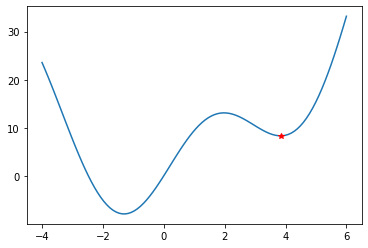

In [41]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.linspace(-4,6,100)
def grad(x):
    return 2*x + 10*np.cos(x)
def cost(x):
    return x**2 + 10*np.sin(x)
def GD( eta,x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if(abs(grad(x[-1]))<1e-3):
            break
        x.append(x_new)
    return (x, it)
(x1, it1) = GD(0.1, 5)
print( x1[-1], it1)
plt.plot(x,cost(x))
plt.plot(x1[-1],cost(x1[-1]), 'r*')
plt.show()

interation 99 theta: -1.3102051314532384


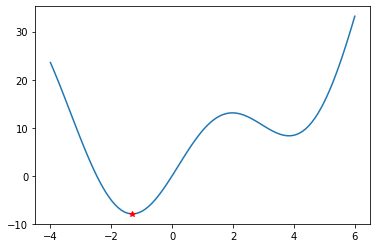

In [42]:
# Gradient MoMenTum (vận tốc lấy đà)
import numpy as np
import matplotlib.pyplot as plt
import math

def has_converged(theta_new, grad):
    return  True if np.linalg.norm(grad(theta_new))<1e-3 else False
def GD_momentum(theta_init,eta,grad,gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta* grad(theta[-1])
        theta_new = theta[-1] - v_new
        if( has_converged(theta_new, grad)== True):
            break
        theta.append(theta_new)
        v_old =v_new
    return (theta,it)
(theta, it) = GD_momentum(5, 0.1,grad,0.9)
print('interation', it , 'theta:',theta[-1])
plt.plot(x,cost(x))
plt.plot(theta[-1],cost(theta[-1]), 'r*')
plt.show()

In [15]:
# Nesterov accelerated gradient (NAG) (dự đoán hướng đi trong tương lai)
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(1)
X = np.random.rand(1000,1)
y = 4 +3 *X +0.2*np.random.randn(1000,1)

#Building Xbar
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis =1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A),b)
print('solution Linear Regression: w = ',w)

def cost (w):
    N = Xbar.shape[0]
    return 0.5/N*np.linalg.norm(y - Xbar.dot(w),2)**2
def grad(w):
    N = Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w)-y)
def numerical_grad(w, cost):
    eps = 1e-4
    g =  np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps
        w_n[i] -= eps
        g[i]   = (cost(w_p)-cost(w_n))/(2*eps)
    return g
def check_grad(w, grad, cost):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1-grad2)< 1e-3 else False
print("Check:", check_grad(w,grad, cost))

def GD_NAG(w_init,eta,  gamma, grad):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta * grad(w[-1] - gamma* v[-1])
        w_new = w[-1] - v_new
        v.append(v_new)
        w.append(w_new)
        if np.linalg.norm(grad(w[-1]))/len(w[-1]) < 1e-3:
            break
    return (w,v,it)
w_init = np.array([[2],[1]])
(w,v,it) = GD_NAG(w_init,1,0.9,grad)
print('w:',w[-1],'iteration:',it,'grad:',grad(w[-1]))

solution Linear Regression: w =  [[4.00839956]
 [3.00212675]]
Check: True
w: [[4.00551509]
 [3.00427616]] iteration: 31 grad: [[-0.00180847]
 [-0.0007266 ]]


In [54]:
# stochastics Gradient Descent (SGD)
# ưu điểm : hội tụ nhanh
def sgrad( w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i,:]
    yi = y[true_i]
    a = np.dot(xi,w) - yi
    return (xi*a).reshape(2,1)
def SGD(w_init, eta, sgrad):
    w =[w_init]
    w_last_check =w_init
    iter_check_w = 10
    N = X.shape[0]
    count =0
    for it in range(10):
        #shuffle data ( xáo trộn data)
        rd_id = np.random.permutation(N)
        for i in range(N):
            count +=1
            g = sgrad( w[-1],i,rd_id)
            w_new = w[-1] - eta * g
            w.append(w_new)
            if count % iter_check_w ==0:
                w_this_check = w_new
                if np.linalg.norm(w_this_check- w_last_check)/len(w_init)< 1e-3:
                    return (w, it,i)
                w_last_check= w_this_check
    return (w, it, i)
w_init = np.array([[2],[1]])
(weight, it, i) = SGD(w_init,0.1,sgrad)
print(weight[-1], it, i)

[[4.03246546]
 [3.02015613]] 0 399
